### Predicting heart disease using Machine learning 

This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model capable og predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach

1. Problem definition
2. Data
3. Evaluation - what defines success for us ?
4. Features
5. Modelling 
6. Experimentation

###  1.Problem Definition 

Given clinical paarameters of a patient, can we predict whether or not they have heart disease ?

### 2.Data 

The original data came from Cleaveland data from the UCI Machine Learning Repository, there is also a version of it available on Kaggle. 

### 3.Evalutaion 

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

### 4.Features

This is where you get different information about each of the features in your data

** Create a Data Dictionary **

* age: age in years
* sex : (1 = male,0 = female)
* cp : chest pain type
* trestbps : resting blood pressure (in Hg on admission to the hospital)
* cholesrum: Cholestrol in mg/dl
* fbs: (fasting blood sugar >120) (1 = True, = False)
* restecg : resting ecg result
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes, 0 = no)
* oldpeakST : depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* can : number of major vessels (0-3) coloured by flourosopy
* thal3 : normal; 6= fixed defect; 7= reversible defect 
* target : 1 0r 0









### Preapring the tools

we're going to use pandas, numpy and matplotlib for data analysis and manipulation

In [1]:
# Importing all necessary libraries

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#%matplotlib inline  # we want our plots to appear inside the notebook

# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve

### Loading Data


In [2]:
df = pd.read_csv('/Users/aravinds/Documents/skit/data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape #(rows,columns)

(303, 14)

### Exploratory Data Analysis (EDA)

The goal here is to become an expert in the data and become a subject matter expert on the data you are working with


1. What questions are you trying  to solve ?
2. What kind of data do we have ?
3. What's missing from the data and how do we deal with it ?
4. Where are the outliers and why should we care about them ?
5. How can you add, change or remove features to get more about your data ?


In [4]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
165+138 

303

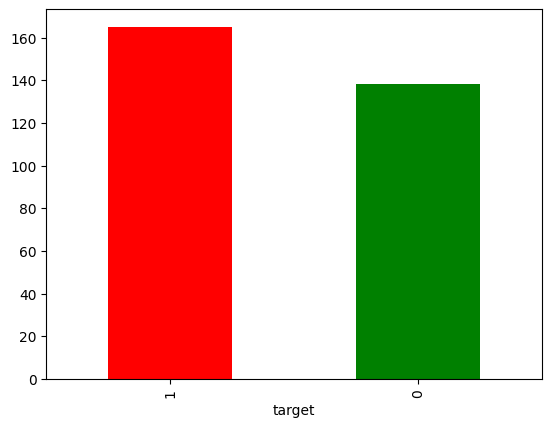

In [6]:
df['target'].value_counts().plot(kind ='bar',color =['red','green']);

In [7]:
# Are there any missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Heart Disease frequency accoring to Gender
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# Comparing Sex with Target column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

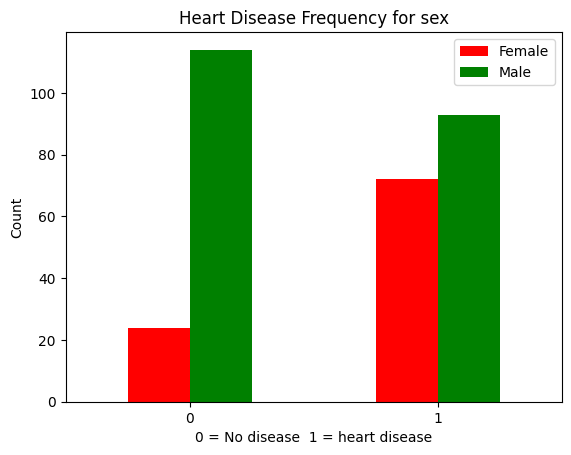

In [11]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind = 'bar',color =['red','green'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No disease  1 = heart disease')
plt.ylabel('Count')
plt.legend(['Female',"Male"])
plt.xticks(rotation=0)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

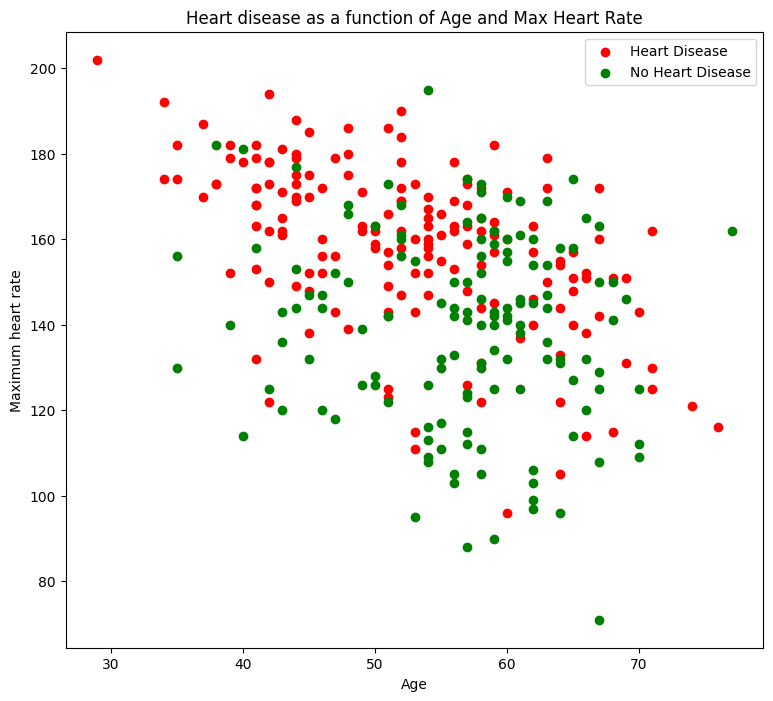

In [14]:
# creating a figure
plt.figure(figsize =(9,8))

#creating a scatter with positive examples
plt.scatter(df.age[df.target ==1],
            df.thalach[df.target ==1],
            c='red');

#scatter with negative examples
plt.scatter(df.age[df.target ==0],
            df.thalach[df.target == 0],
            c ='green');

plt.title('Heart disease as a function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')
plt.legend([ 'Heart Disease',  'No Heart Disease'])

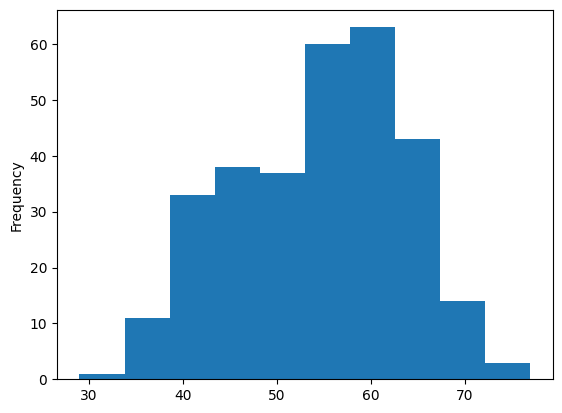

In [15]:
# checking the distribution (Spread of the data) of the age of column using histogram
df.age.plot.hist();

#### Heart Disease Frequency per Chest Pain Type

cp: chest pain type 
* 0 = Typical angina: chest pain related to decreased blood supply to heart
* 1 = Atypical angina : chest pain not related to heart
* 2 = Non Anginal pain = typical esophageal spasms (non heart related)
* 3 = Asymptotic : chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_859/2399583111.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('No disease','disease')


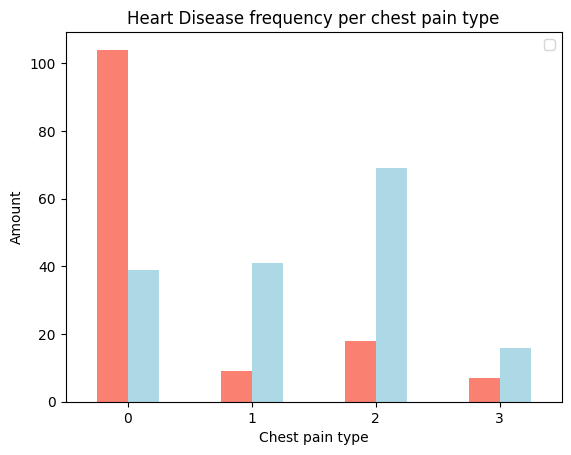

In [17]:
# Make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',color =['salmon','lightblue'])
plt.title('Heart Disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend('No disease','disease')
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Making a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


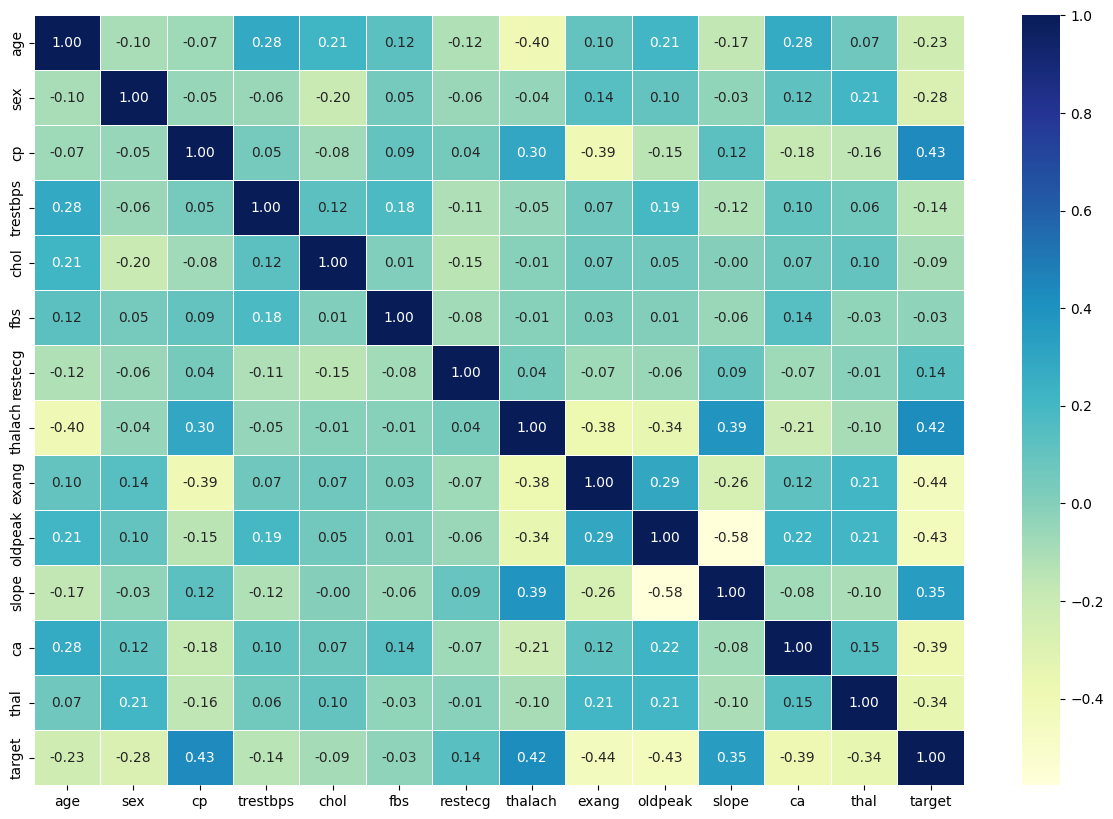

In [20]:
#lets make our correlation matrix prettier

cor_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cor_matrix,annot=True,linewidth = 0.5, fmt ='.2f',cmap='YlGnBu')

### 5.Modelling



In [21]:
# Splitting the data into Features (X) and Lables (y)
X = df.drop('target',axis=1)
y = df['target']

In [22]:
#Splitting the data into training and testing split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [23]:
'''Now we've got our data split into training and test sets, its time to build a machine learning model
we will try 3 different models
1. Logistic Regression
2. K - Nearest Neighbours
3. Random Forest Regressor'''

# Put Models in a dictionary

models ={'Logistic Regression': LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'Random Forest Classifier': RandomForestClassifier()}


# Create a function to fit and score model

def fit_and_score(model,X_train,X_test,y_train,y_test):
    ''' Fits and evaluates a given machine learning model
        models : a dict of different scikit learn machine learning models
        X_train:  training data (no labesl)
        X_test : testing data (no labels)
        y_train: training label
        y_test : testing labels'''
    np.random.seed(42)

    #Make a dictionary of model scores
    model_scores ={}

    #Loop through models
    for name, model in model.items():
        # fit the model to the data 
        model.fit(X_train,y_train)

        #Evaluate the model and append its score to model_scores dictionary
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        


In [24]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

/Users/aravinds/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.5737704918032787,
 'Random Forest Classifier': 0.819672131147541}

<Axes: >

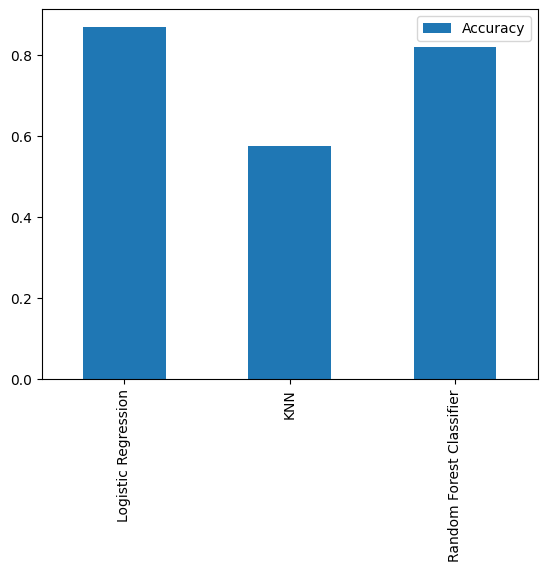

In [25]:
# model comparison 
model_compare = pd.DataFrame(model_scores,index =['Accuracy'])
model_compare.T.plot.bar()

Now we have got the baseline model,and we know a model's first predictions aren't always what we should based our next steps of., what should we do ?

Lets look at the following
* Hyperparameter Tuning 
* Feature importance
* Confusion matrix
* Cross - Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve 

In [26]:
# Hyperparameter tuning 
# Tuning KNN
training_scores =[]
test_scores =[]


# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup knn instancw
knn = KNeighborsClassifier()


#loop through different neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit knn
    knn.fit(X_train,y_train)

    #update the training scores
    training_scores.append(knn.score(X_train,y_train))

    #update test scores
    test_scores.append(knn.score(X_test,y_test))

test_scores

[0.5573770491803278,
 0.5245901639344263,
 0.5573770491803278,
 0.6065573770491803,
 0.5737704918032787,
 0.5901639344262295,
 0.639344262295082,
 0.5737704918032787,
 0.6229508196721312,
 0.5901639344262295,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082]

Maximum KNN score on the test data 68.85%


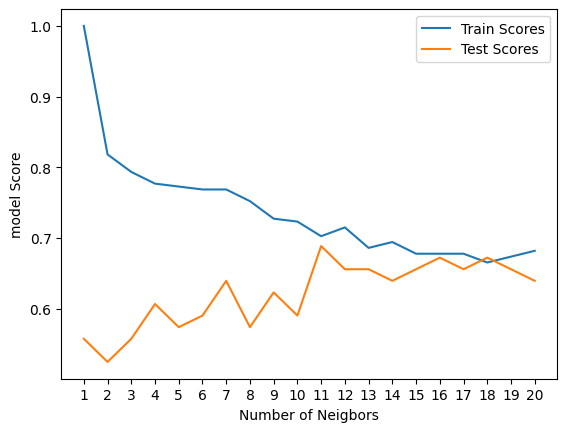

In [27]:
plt.plot(neighbors,training_scores, label ='Train Scores')
plt.plot(neighbors,test_scores, label = 'Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neigbors')
plt.ylabel('model Score')
plt.legend()

print(f'Maximum KNN score on the test data {max(test_scores)*100:.2f}%')

In [28]:
# Hyperparameter Tuning using Randomized search CV
''' We are going to tune 
* LogisticRegression()
* RandomForestClassifier()'''

# Creating a Hyper parameter grid  for LogisticRegression

log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']
                }

# Creating a hyperparameter grid for RandomForestClassifier

rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)
           }

In [29]:
# Tuning Logistic Regression Model 

np.random.seed(42)

#setup random hyperparameter search for Logistic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid, cv=5, n_iter =20,verbose=True)

#Fit random hyper parameter Model for Logistic Regression 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(11.288378916846883)}

In [31]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

In [32]:
# Tuning Random Forest Classifier 

rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter =20,verbose = True)
rs_rf.fit(X_train,y_train)
rs_rf.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8360655737704918

In [33]:
rs_rf.best_params_

{'n_estimators': np.int64(860),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(3),
 'max_depth': None}

In [34]:
# Hyper Parameter Tuning usig Grid Search CV
''' Since the Logistic regression model gave the best result so far, we will try to improve it using GridSearchCV'''

log_reg_grid={'C':np.logspace(-4,4,30),
             'solver':['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

#fit grid hyper parameter searched model

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.best_params_

{'C': np.float64(0.38566204211634725), 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(X_test,y_test)

0.8688524590163934

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion Matrix
* Classifier report
* Precision
* Recall 
* F1- score


In [37]:
# Make predictions using tuned model
y_score = gs_log_reg.predict_proba(X_test)
y_score = y_score[:,1]

In [38]:
import sklearn
sklearn.__version__

'1.6.1'

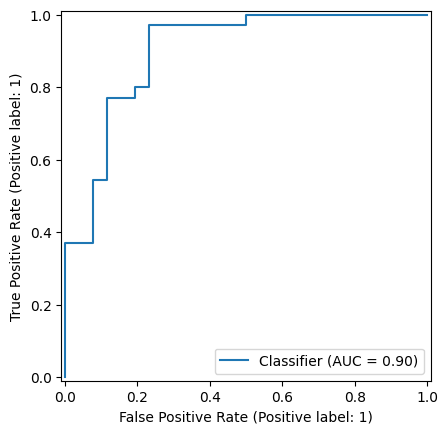

In [39]:
# ROC curve and calculate AUC metric
RocCurveDisplay.from_predictions(y_test,y_score)



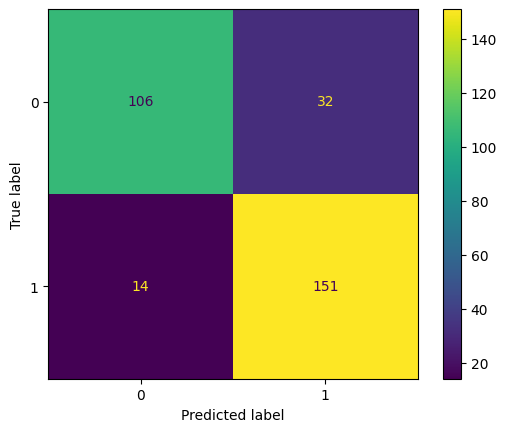

In [40]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(estimator = gs_log_reg,X=X,y=y)

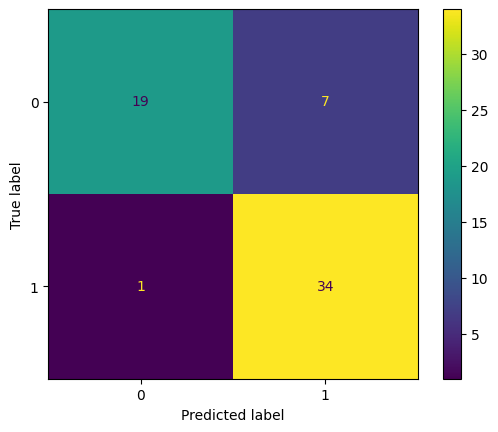

In [41]:
# confusion matrix plotted on predictions and true labels
y_preds = gs_log_reg.predict(X_test)
cm = confusion_matrix(y_test,y_preds)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();



In [42]:
'''Lets create a classification report and cross validated precision, recall and f1 score'''

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.83      0.97      0.89        35

    accuracy                           0.87        61
   macro avg       0.89      0.85      0.86        61
weighted avg       0.88      0.87      0.87        61



In [43]:
# Calculate evaluation metrics using cross validation
''' we are going to calculate accuracy, precision,recall and f1 score of our model using cross validation and to do so we will be using 
cross_val_score()'''

# checking best hyperparameters 
gs_log_reg.best_params_

{'C': np.float64(0.38566204211634725), 'solver': 'liblinear'}

In [69]:
clf = LogisticRegression(C = 0.38566204211634725,solver ='liblinear')
# clf =gs_log_reg

clf.fit(X_train,y_train)
#cross_validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

np.float64(0.8380874316939891)

In [68]:
#Cross validated precision 
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision =np.mean(cv_precision)
cv_precision


np.float64(0.8154667272314331)

In [64]:
# Cross validated recall 
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9151515151515153)

In [65]:
# cross validated f1 score

cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8614850462777628)

In [66]:
# cross validated f1 score

cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8614850462777628)

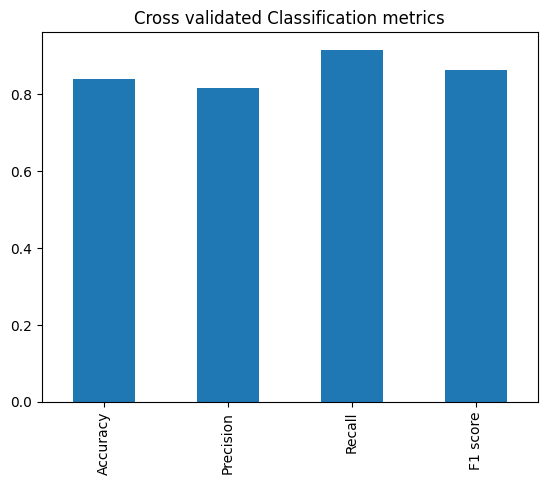

In [67]:
# visualize cross validated metrics 

cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'F1 score': cv_f1}, index =[0])

cv_metrics.T.plot.bar(title='Cross validated Classification metrics', legend=False);

##### Feature Importance

Feature importance is another way of asking, which features contributed most to the outcome of the model and how did they contribute ?

Finding feature importance is different for each machine learning model


In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
# check coef_
clf.coef_

array([[ 0.00601383, -0.95378515,  0.75739466, -0.01187032, -0.00539195,
         0.07416245,  0.27001672,  0.03015971, -0.63450696, -0.50149057,
         0.41015629, -0.63197175, -0.64873608]])

In [71]:
# match coef to features

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.006013831394715249),
 'sex': np.float64(-0.9537851510470919),
 'cp': np.float64(0.7573946570801593),
 'trestbps': np.float64(-0.01187031655338817),
 'chol': np.float64(-0.005391947242599942),
 'fbs': np.float64(0.07416245031510453),
 'restecg': np.float64(0.2700167180256522),
 'thalach': np.float64(0.030159710965075484),
 'exang': np.float64(-0.6345069620338876),
 'oldpeak': np.float64(-0.5014905720344419),
 'slope': np.float64(0.41015629231587836),
 'ca': np.float64(-0.631971754596746),
 'thal': np.float64(-0.6487360842155917)}

<Axes: title={'center': 'Feature Importance'}>

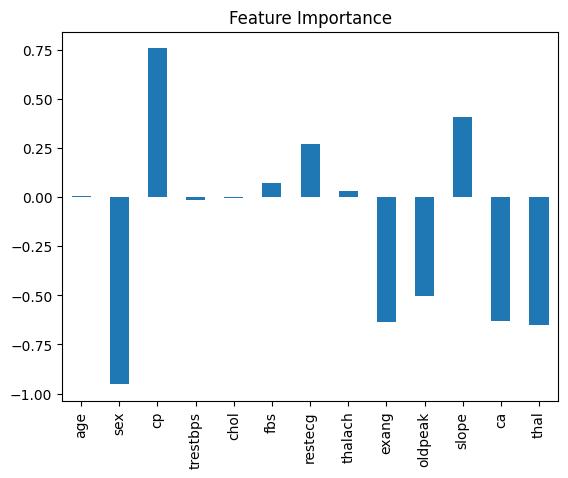

In [73]:
# visualize feature importance 

feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title ='Feature Importance', legend = False)